## Exercise : Exploring Matplotlib and Clustering (K-Means)

**Exercise 6 : Exploring Matplotlib and Clustering (K-Means)  
1. Read the data from Mall_Customers CSV  
1.1 Extract the columns CustomerID and Spending Score  
1.2 Create scatter plot (customer ID vs Spending Score)  
2. Apply Clustering Kmeans and distribute customers into 5 groups with color in each group.
3. Do same clustering for 'income vs Spending Score'

In [3]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import sklearn
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#Read in csv data
path = os.getcwd()
sourcedata = path + '\\sourcedata\\' + 'Mall_Customers.csv'
df = pd.read_csv(sourcedata)
#print(sourcedata)

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
#Use KMeans to check if we can identify a group of people
cols = ['CustomerID', 'Spending Score (1-100)']
df1 = df[cols]


In [11]:
df1.head()

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40


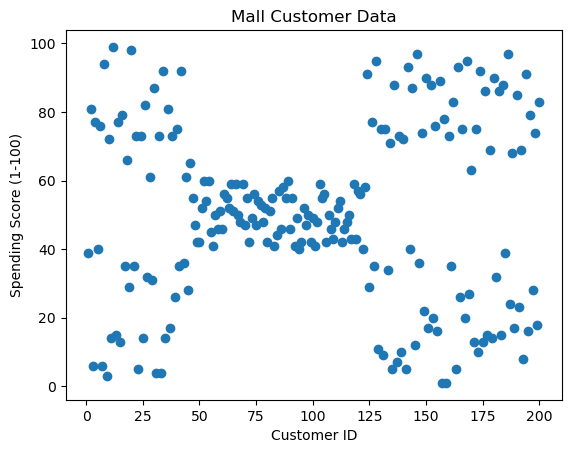

In [13]:
# Create scatter plot of Customer ID vs Spending Score
plt.scatter(df['CustomerID'],df['Spending Score (1-100)'])
plt.title('Mall Customer Data')
plt.xlabel('Customer ID')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [15]:
#Apply Clustering Kmeans and distribute customers into 5 groups, and color the groups.
#Convert data to a numpy array
data= np.column_stack((df['CustomerID'],df['Spending Score (1-100)']))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


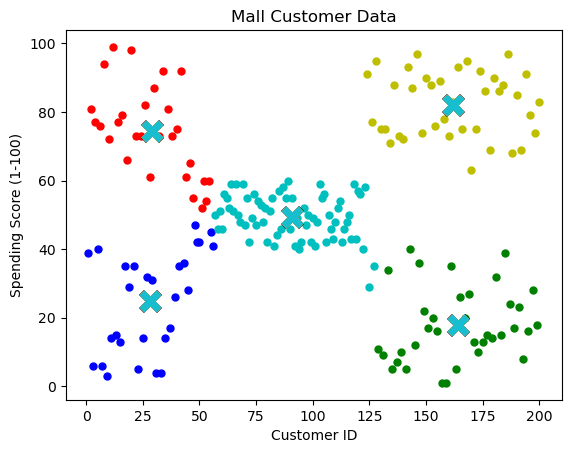

In [17]:
#K-Means
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
    
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
    
colors = ["g.","r.","c.","y.","b."]
for i in range(len(data)):
    #print("coordinate:",data[i], "label:", labels[i])
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize = 10)
    plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5,zorder = 10)

plt.title('Mall Customer Data')
plt.xlabel('Customer ID')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [19]:
#Apply the same clustering for 'income vs Spending Score'
cols = ['Annual Income (k$)', 'Spending Score (1-100)']
df2 = df[cols]

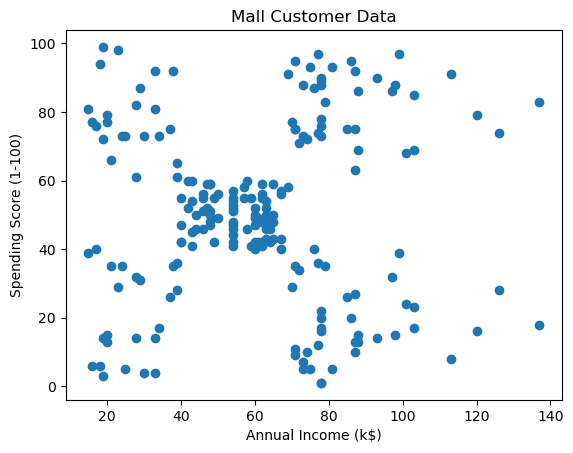

In [21]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.title('Mall Customer Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [23]:
#Apply Clustering Kmeans and distribute customers into 5 groups. Color the groups.
# convert data to a numpy array
data= np.column_stack((df['Annual Income (k$)'],df['Spending Score (1-100)']))

In [25]:
#K-Means
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [27]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

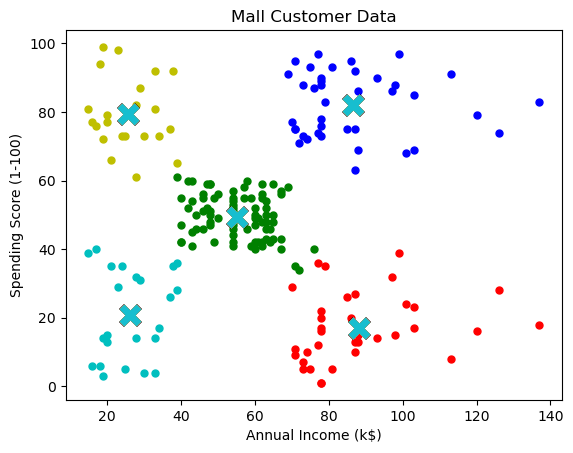

In [29]:

colors = ["g.","r.","c.","y.","b."]
for i in range(len(data)):
    #print("coordinate:",data[i], "label:", labels[i])
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize = 10)
    plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5,zorder = 10)

plt.title('Mall Customer Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [31]:
df2['Group']=labels
df2.head() # Show first 5 rows

C:\Users\Luciana\AppData\Local\Temp\ipykernel_15548\330100576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Group']=labels


,Annual Income (k$),Spending Score (1-100),Group
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
